# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Data

In [2]:
data_df=pd.read_csv('../input/d/samuelcortinhas/uk-median-house-prices-and-salary-19752020/UK historical house prices and salary/Average_UK_houseprices_and_salary.csv')
data_df.drop('Unnamed: 3', axis=1, inplace=True) # not sure why that column is there
data_df.head()

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds)
0,1975,94983,NaN
1,1976,89281,NaN
2,1977,85028,NaN
3,1978,100519,NaN
4,1979,112067,NaN


In [3]:
paygap_df=pd.read_csv('../input/d/samuelcortinhas/uk-median-house-prices-and-salary-19752020/UK historical house prices and salary/Income_by_age_and_gender.csv')
paygap_df

,Age group,Median salary (pounds),Gender
0,18 to 21,18392,Male
1,22 to 29,26856,Male
2,30 to 39,34210,Male
3,40 to 49,38463,Male
4,50 to 59,36000,Male
5,60 and over,30944,Male
6,18 to 21,17005,Female
7,22 to 29,25115,Female
8,30 to 39,30540,Female
9,40 to 49,31679,Female


# Average house prices

Text(0, 0.5, 'Average price adjusted by inflation (£)')

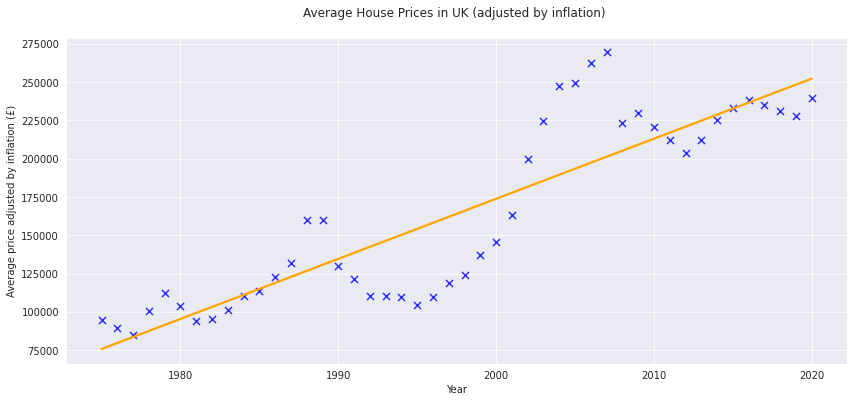

In [4]:
# Figure size
plt.figure(figsize=(14,6))

# Scatterplot with regression lines
sns.regplot(x='Year', y='Average house price adj. by inflation (pounds)', data=data_df, 
            marker='x', scatter_kws={"s": 50, 'color':'blue'}, line_kws={"color": "orange"}, ci=False)

# Aesthetics
plt.title('Average House Prices in UK (adjusted by inflation) \n')
plt.ylabel('Average price adjusted by inflation (£)')

**Regression line**

In [5]:
# Slope of regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(data_df['Year'],
                                                               data_df['Average house price adj. by inflation (pounds)'])

print('The slope of the regression line is: £','{:.2f}'.format(slope))

The slope of the regression line is: £ 3920.94


**Observations:**
* The regression line tells us that houses prices are **increasing** each year on average **after inflation has been taken into account.** By nearly £4000 a year! 
* We also see that houses prices took a serious drop in 2008/2009 due to the housing market crash at that time. 
* In the space of 45 years, the average house price has increased from roughly £100,000 to £250,000. That is a 250% increase!


# Average wages

Text(0, 0.5, 'Average wage adjusted by inflation (£)')

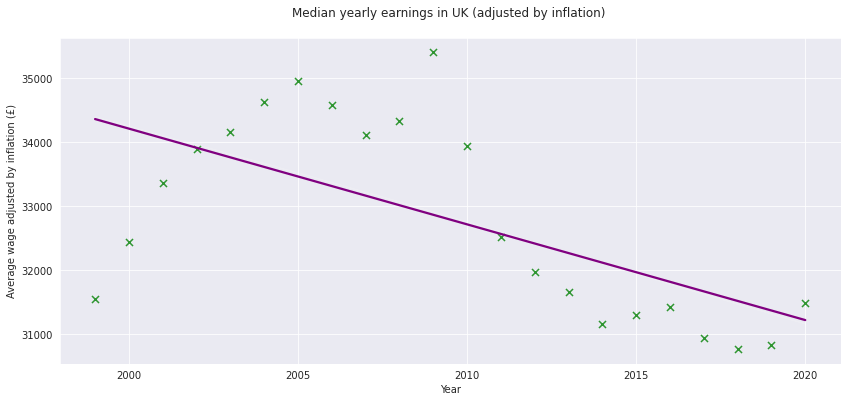

In [6]:
# Figure size
plt.figure(figsize=(14,6))

# Scatterplot with regression lines
sns.regplot(x='Year', y='Median Salary adj. by inflation (pounds)', data=data_df, 
            marker='x', scatter_kws={"s": 50, 'color':'green'}, line_kws={"color": "purple"}, ci=False)

# Aesthetics
plt.title('Median yearly earnings in UK (adjusted by inflation) \n')
plt.ylabel('Average wage adjusted by inflation (£)')

In [7]:
# Slope of regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(data_df.iloc[24:,0],
                                                               data_df.iloc[24:,2])

print('The slope of the regression line is: £','{:.2f}'.format(slope))

The slope of the regression line is: £ -149.39


**Observations:**
* The average salary in the UK is actually **decreasing** (by £150) each year on average after inflation has been taken into account. 
* It seems they took the biggest hit just after the housing market crash of 2008-2009. 
* Whilst house prices bounced back after 2010, wages have not. 

# Bonus Section: The Pay Gap

On the theme of unfairness I thought I would also thrown in some analysis of this interesting dataset. 

Text(0.5, 1.0, 'Average UK wages in 2021 by age group and gender \n')

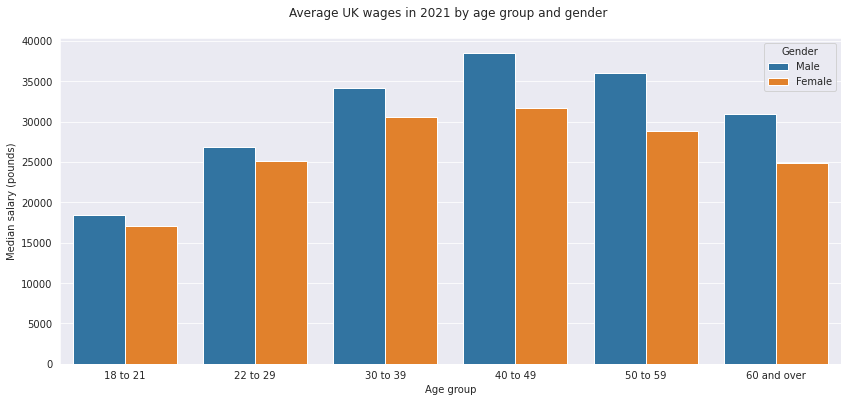

In [8]:
# Figure size
plt.figure(figsize=(14,6))

# Scatterplot with regression lines
sns.barplot(x='Age group', y='Median salary (pounds)', data=paygap_df, hue='Gender')

# Aesthetics
plt.title('Average UK wages in 2021 by age group and gender \n')

**Observations:**
* Wages increase with age until the 40-49 age group. They then decrease for over 50's.
* Men out-earn Women in every age group.
* The pay gap increases with age. 

